In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regressionfrom sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler


# Read the CSV file
train_data = pd.read_csv("C:/Users/qaz12/Downloads/train.csv")

# Drop the first column
train_data = train_data.iloc[:, 1:]

train_data['district'] = train_data['district'].astype('category')

# If you have a separate test dataset, you can read and process it similarly
te = pd.read_csv("C:/Users/qaz12/Downloads/test.csv")
test_data = te.iloc[:, 1:]
test_data['district'] = test_data['district'].astype('category')


C:\Users\qaz12\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


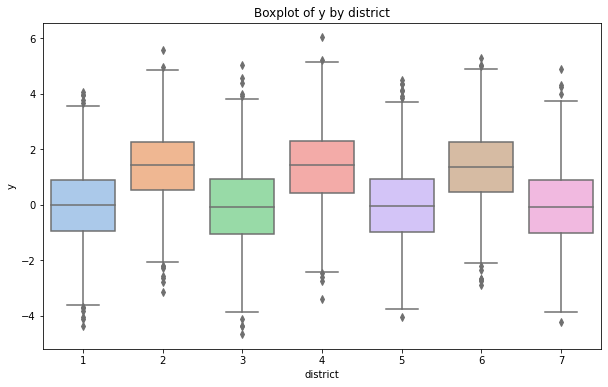

In [61]:
# Create a sample dataset with two categorical variables and a numerical response
np.random.seed(0)
data = pd.DataFrame({
    'district': train_data['district'],  # Second categorical variable
    'y': train_data['y']  # Numerical response
})

# Create a boxplot with hue to distinguish the second categorical variable
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='district', y='y', data=data, palette='pastel')  # Boxplot with different colors for a2
plt.title('Boxplot of y by district')
plt.xlabel('district')
plt.ylabel('y')
plt.show()  # Display the boxplot

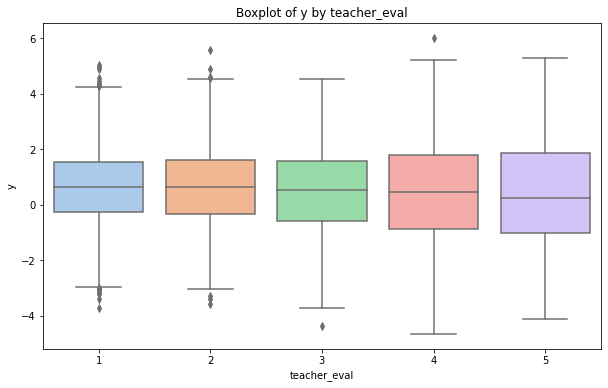

In [62]:
# Create a sample dataset with two categorical variables and a numerical response
np.random.seed(0)
data = pd.DataFrame({
    'teacher_eval': train_data['teacher_eval'],  # Second categorical variable
    'y': train_data['y']  # Numerical response
})

# Create a boxplot with hue to distinguish the second categorical variable
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='teacher_eval', y='y', data=data, palette='pastel')  # Boxplot with different colors for a2
plt.title('Boxplot of y by teacher_eval')
plt.xlabel('teacher_eval')
plt.ylabel('y')
plt.show()  # Display the boxplot

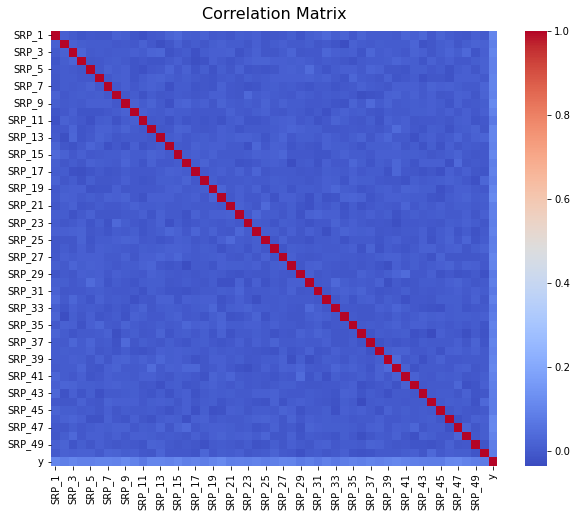

In [63]:
# correlation matrix
correlation_matrix = train_data.iloc[:,4:].corr()
plt.figure(figsize=(10, 8))  # Set the figure size
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 16}, pad=12)

# Show the plot
plt.show()


C:\Users\qaz12\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\qaz12\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


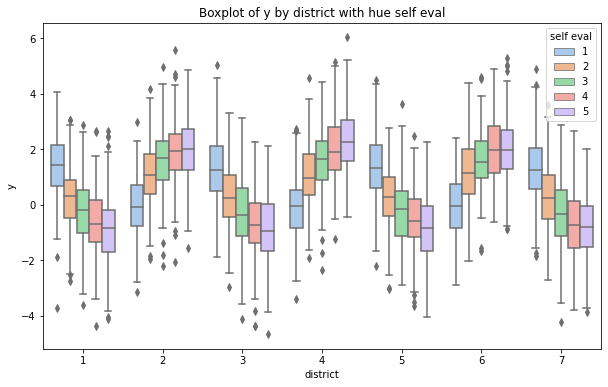

In [64]:
np.random.seed(0)
data = pd.DataFrame({
    'self eval': train_data['self_eval'], 
    'district': train_data['district'], 
    'y': train_data['y']  
})

plt.figure(figsize=(10, 6))  
sns.boxplot(x='district', y='y', hue='self eval', data=data, palette='pastel') 
plt.title('Boxplot of y by district with hue self eval')
plt.xlabel('district')
plt.ylabel('y')
plt.show()

C:\Users\qaz12\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\qaz12\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


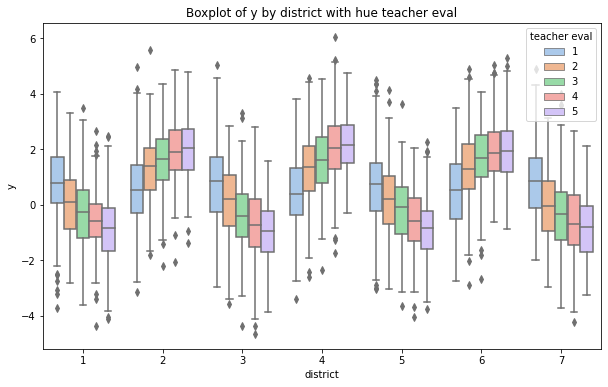

In [65]:
data = pd.DataFrame({
    'teacher eval': train_data['teacher_eval'], 
    'district': train_data['district'], 
    'y': train_data['y']  
})

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='district', y='y', hue='teacher eval', data=data, palette='pastel')
plt.title('Boxplot of y by district with hue teacher eval')
plt.xlabel('district')
plt.ylabel('y')
plt.show()

C:\Users\qaz12\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\qaz12\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


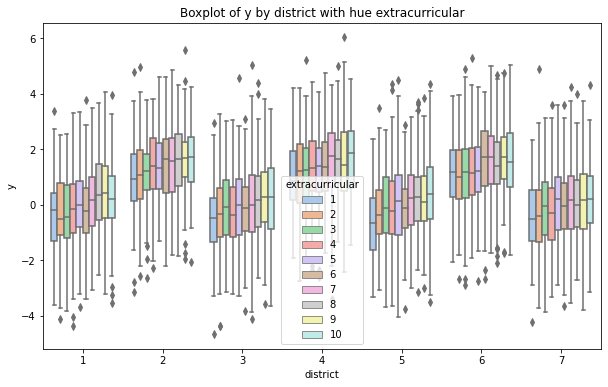

In [66]:
data = pd.DataFrame({
    'extracurricular': train_data['extracurricular'],
    'district': train_data['district'], 
    'y': train_data['y']  
})

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='district', y='y', hue='extracurricular', data=data, palette='pastel') 
plt.title('Boxplot of y by district with hue extracurricular')
plt.xlabel('district')
plt.ylabel('y')
plt.show()  

In [67]:
encoded_data = pd.get_dummies(train_data.drop('y',axis=1), columns=['district'])

# Create a sample DataFrame with two sets of variables
data = pd.DataFrame({
    'self_eval': train_data['self_eval'],
    'teacher_eval': train_data['teacher_eval'],
    'extracurricular': train_data['extracurricular'], 
    'dis_1': encoded_data['district_1'],
    'dis_2': encoded_data['district_2'],
    'dis_3': encoded_data['district_3'],
    'dis_4': encoded_data['district_4'],
    'dis_5': encoded_data['district_5'],
    'dis_6': encoded_data['district_6'],
    'dis_7': encoded_data['district_7'],

})

c1 = ['self_eval', 'teacher_eval', 'extracurricular']  # First set of variables
c2 = ['dis_1', 'dis_2','dis_3','dis_4','dis_5','dis_6','dis_7']  # Second set of variables

interactions = {}

# Loop through all combinations of c1 and c2 to create interaction terms
for col1 in c1:
    for col2 in c2:
        interaction_name = f'{col1}_x_{col2}'
        interactions[interaction_name] = data[col1] * data[col2]

interactions_df = pd.DataFrame(interactions)
final_data = pd.concat([encoded_data, interactions_df], axis=1)
print("DataFrame with Interaction Terms between c1 and c2:")
print(final_data)


DataFrame with Interaction Terms between c1 and c2:
      self_eval  teacher_eval  extracurricular  SRP_1  SRP_2  SRP_3  SRP_4  \
0             4             5                9 -0.181 -0.379 -0.164  0.080   
1             4             3                5 -0.126  1.603  1.021  0.489   
2             1             2                8  0.724 -0.702  2.249  0.910   
3             3             3               10  0.706 -0.302  1.023 -0.895   
4             5             5                1 -0.350 -1.001  0.931  0.192   
...         ...           ...              ...    ...    ...    ...    ...   
7995          2             1                2  1.035  1.359  1.558 -1.530   
7996          5             3                1 -0.236 -0.723 -1.624 -1.306   
7997          4             3                2  0.233 -1.349 -0.876 -0.544   
7998          5             5                5 -1.041  2.261  1.334  0.562   
7999          5             5                2  1.047 -1.914  0.659  0.055   

      SRP_5

# Elastic Net

In [69]:
X =final_data   # Features
y = train_data['y']   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
param_grid = {
    'alpha': np.arange(0.00001,0.1,100),
    'l1_ratio':np.arange(0.00001,0.1,100),
    'max_iter': [1000000] 
}

# elasticnet regression with cv
elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

optimal_alpha = grid_search.best_params_['alpha']
optimal_l1_ratio = grid_search.best_params_['l1_ratio']
print("Optimal alpha:", optimal_alpha)
print("Optimal l1_ratio:", optimal_l1_ratio)

In [ ]:
cv_results = grid_search.cv_results_
for mean_test_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean test score:", mean_test_score, "Parameters:", params)

optimal_alpha = grid_search.best_params_['alpha']
optimal_l1_ratio = grid_search.best_params_['l1_ratio']
print("Optimal alpha:", optimal_alpha)
print("Optimal l1_ratio:", optimal_l1_ratio)

In [9]:
encoded_data = pd.get_dummies(train_data.drop('y',axis=1), columns=['district'], drop_first=True)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(encoded_data)  # Assuming X_train is a numpy array
X_poly_df = pd.DataFrame(X_poly)
X_poly_combined = np.concatenate((X_poly_df, encoded_data), axis=1)

X = X_poly_combined   # Features
y = train_data['y']   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [147]:
encoded_data = pd.get_dummies(test_data, columns=['district'])

# Create a sample DataFrame with two sets of variables
data = pd.DataFrame({
    'self_eval': encoded_data['self_eval'],
    'teacher_eval': encoded_data['teacher_eval'],
    'extracurricular': encoded_data['extracurricular'], 
    'dis_1': encoded_data['district_1'],
    'dis_2': encoded_data['district_2'],
    'dis_3': encoded_data['district_3'],
    'dis_4': encoded_data['district_4'],
    'dis_5': encoded_data['district_5'],
    'dis_6': encoded_data['district_6'],
    'dis_7': encoded_data['district_7'],

})

# Define the column sets
c1 = ['self_eval', 'teacher_eval', 'extracurricular']  # First set of variables
c2 = ['dis_1', 'dis_2','dis_3','dis_4','dis_5','dis_6','dis_7']  # Second set of variables

# Create interaction terms between all possible pairs of c1 and c2
interactions = {}

# Loop through all combinations of c1 and c2 to create interaction terms
for col1 in c1:
    for col2 in c2:
        interaction_name = f'{col1}_x_{col2}'
        interactions[interaction_name] = data[col1] * data[col2]

# Convert the interaction terms into a DataFrame
interactions_df = pd.DataFrame(interactions)

# Add the interaction terms to the original data
p_data = pd.concat([encoded_data, interactions_df], axis=1)

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01, max_iter=100000)  # Increased max_iter to ensure convergence
elastic_net.fit(final_data, y)

# Predict on the test set
y_pred = elastic_net.predict(p_data)
a1 = np.array(te.iloc[:,0])
df = pd.DataFrame({'SEQN': a1, 'y': y_pred})


df.to_csv('C:/Users/qaz12/Downloads/res.csv', index=False)

In [50]:
alphas = np.logspace(-4, -3, 100)
param_grid = {'alpha': alphas,'max_iter': [10**8]}


ridge = Ridge()

# Perform GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=20, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Instantiate Lasso model with the best alpha
lasso_best = Ridge(alpha=best_alpha, max_iter = 10**20)

print("Best alpha:", best_alpha)


Best alpha: 0.0007390722033525775


In [53]:
encoded_data = pd.get_dummies(test_data, columns=['district'])

# Create a sample DataFrame with two sets of variables
data = pd.DataFrame({
    'self_eval': encoded_data['self_eval'],
    'teacher_eval': encoded_data['teacher_eval'],
    'extracurricular': encoded_data['extracurricular'], 
    'dis_1': encoded_data['district_1'],
    'dis_2': encoded_data['district_2'],
    'dis_3': encoded_data['district_3'],
    'dis_4': encoded_data['district_4'],
    'dis_5': encoded_data['district_5'],
    'dis_6': encoded_data['district_6'],
    'dis_7': encoded_data['district_7'],

})

# Define the column sets
c1 = ['self_eval', 'teacher_eval', 'extracurricular']  # First set of variables
c2 = ['dis_1', 'dis_2','dis_3','dis_4','dis_5','dis_6','dis_7']  # Second set of variables

# Create interaction terms between all possible pairs of c1 and c2
interactions = {}

# Loop through all combinations of c1 and c2 to create interaction terms
for col1 in c1:
    for col2 in c2:
        interaction_name = f'{col1}_x_{col2}'
        interactions[interaction_name] = data[col1] * data[col2]

# Convert the interaction terms into a DataFrame
interactions_df = pd.DataFrame(interactions)

# Add the interaction terms to the original data
p_data = pd.concat([encoded_data, interactions_df], axis=1)

ridge = Ridge(alpha= 0.0007390722033525775, max_iter=10000000)
ridge.fit(final_data, y)

# Predict on the test set
y_pred = ridge.predict(p_data)
a1 = np.array(te.iloc[:,0])
df = pd.DataFrame({'SEQN': a1, 'y': y_pred})


df.to_csv('C:/Users/qaz12/Downloads/res.csv', index=False)